# Importing libraries

In [1]:
# %matplotlib inline
%matplotlib widget
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import time
import statistics
import matplotlib as mpl
import seaborn as sns
from scipy import sparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA as pca
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor as ETR

In [2]:
df=pd.read_excel('out.xlsx')
print(df.shape)
df.head()

(35, 7)


,SN,Lat,Long,Elevation (m),Aquifer_thick,Aquifer_Resistivity,Basement depth (m)
0,1,25.344714,79.102980,195,16.2,25.1,42.1
1,2,25.332711,79.117140,200,13.3,13.8,35.0
2,3,25.287491,79.108559,210,7.5,112.0,30.0
3,4,25.316176,79.151097,198,7.6,15.7,31.0
4,5,25.393591,79.125710,165,3.4,21.4,33.0


In [3]:
df=df.set_index("SN")

In [4]:
df=pd.DataFrame(df,columns=['Lat','Long','Elevation (m)','Basement depth (m)'])
df.rename(columns={'Basement depth (m)':'Aquifer depth (m)'},inplace= True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 1 to 35
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Lat                35 non-null     float64
 1   Long               35 non-null     float64
 2   Elevation (m)      35 non-null     int64  
 3   Aquifer depth (m)  35 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.4 KB


In [6]:
round(df.describe(),2)

,Lat,Long,Elevation (m),Aquifer depth (m)
count,35.00,35.00,35.00,35.00
mean,25.27,79.20,193.09,31.79
std,0.09,0.06,24.23,8.22
min,25.13,79.10,145.00,17.10
25%,25.19,79.15,173.00,27.00
50%,25.26,79.20,198.00,31.00
75%,25.35,79.24,210.00,35.00
max,25.42,79.30,243.00,52.20


In [7]:
df['Aquifer depth (m)'].mean()+3*df['Aquifer depth (m)'].std()

56.44059444273668

In [8]:
# df['Basement depth (m)'].value_counts()

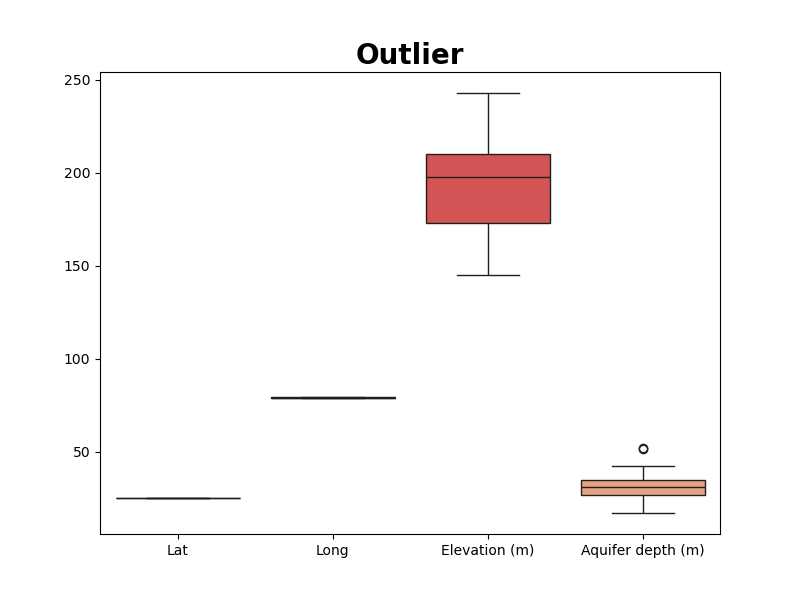

In [9]:
fig=plt.figure(figsize=(8,6))
sns.boxplot(df,palette='rocket')
plt.title('Outlier',fontsize=20,fontweight='bold')
# Save the plot to a file (e.g., PNG)
plt.savefig("outlier_detection_prakash.png")
plt.show()

In [10]:
q1=df['Aquifer depth (m)'].quantile(0.25)
q3=df['Aquifer depth (m)'].quantile(0.75)
iqr=q3-q1
iqr

8.0

In [11]:
df[df['Aquifer depth (m)']>(q3+1.5*iqr)]   # outlier in baesement depth 

,Lat,Long,Elevation (m),Aquifer depth (m)
SN,,,,
23,25.200462,79.141760,230,52.2
30,25.171023,79.239411,196,51.5


In [12]:
df=df[df['Aquifer depth (m)']<(q3+1.5*iqr)]  
df#removed outlier from basement depth

,Lat,Long,Elevation (m),Aquifer depth (m)
SN,,,,
1,25.344714,79.102980,195,42.1
2,25.332711,79.117140,200,35.0
3,25.287491,79.108559,210,30.0
4,25.316176,79.151097,198,31.0
5,25.393591,79.125710,165,33.0
6,25.415562,79.111987,172,28.0
7,25.387103,79.216215,145,35.0
8,25.394851,79.179402,161,40.0
9,25.370851,79.181320,174,34.0


In [13]:
# q1=df['Aquifer_thick'].quantile(0.25)
# q3=df['Aquifer_thick'].quantile(0.75)
# iqr=q3-q1
# print(q1)
# print(q3)
# print(iqr)

In [14]:
# df[df['Aquifer_thick']>(q3+1.5*iqr)]   # outlier in aquifer thickness

In [15]:
# df=df[df['Aquifer_thick']<(q3+1.5*iqr)]  # removed outlier

In [16]:
# q1=df['Aquifer_Resistivity'].quantile(0.25)
# q3=df['Aquifer_Resistivity'].quantile(0.75)
# iqr=q3-q1
# print(q1)
# print(q3)
# print(iqr)

In [17]:
# df[df['Aquifer_Resistivity']>(q3+1.5*iqr)]   # outlier in aquifer resistivity

In [18]:
# df=df[df['Aquifer_Resistivity']<(q3+1.5*iqr)]  # remoce outlier from aquifer resistivity

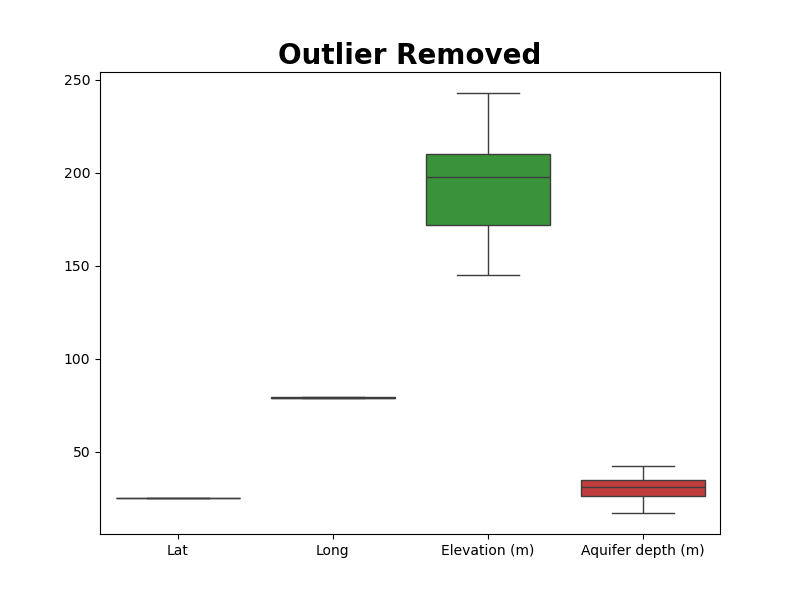

In [19]:
fig1=plt.figure(figsize=(8,6))
sns.boxplot(df)
plt.title('Outlier Removed',fontsize=20,fontweight='bold')
# Save the plot to a file (e.g., PNG)
plt.savefig("outlier_removed_prakash.png")
plt.show()

In [20]:
X=pd.DataFrame(df,columns=['Lat','Long'])
y=pd.DataFrame(df,columns=['Aquifer depth (m)'])

In [21]:
print(X.shape)
print(y.shape)

(33, 2)
(33, 1)


In [22]:
y=np.ravel(y)
print(y,type(y))

[42.1 35.  30.  31.  33.  28.  35.  40.  34.  30.  40.  28.  35.  32.
 34.  36.  32.  25.  34.  40.5 21.4 19.  42.5 23.1 25.6 17.7 25.  28.
 31.  17.1 26.  30.  28. ] <class 'numpy.ndarray'>


# Feature Scaling ( Standardization)

In [23]:
Xx=pd.DataFrame(df,columns=['Lat','Long'])
x_ = df['Lat']
y_ = df['Long']
z_ = df['Aquifer depth (m)']
# scaler=StandardScaler()
# X_norm=scaler.fit_transform(X)
# Xx_norm = scaler.fit_transform(Xx)

# MinMaxScaler

In [24]:
scaler=MinMaxScaler()
# xx_scaled=scaler_m.fit_transform(Xx)

In [25]:
Xx.head()

,Lat,Long
SN,,
1,25.344714,79.102980
2,25.332711,79.117140
3,25.287491,79.108559
4,25.316176,79.151097
5,25.393591,79.125710


# Point Cloud Generation

In [26]:
Lat = x_.values.reshape(-1,1)

pf=PolynomialFeatures(degree=4)
xpol = pf.fit_transform(Lat)

regression_linear = LinearRegression()
regression_linear.fit(xpol,y_)

Lat = np.linspace(x_.min(),x_.max(),4000)
noise=np.random.randn(4000)*0.08
Long = (Lat**4)*regression_linear.coef_[4] + (Lat**3)*regression_linear.coef_[3] + (Lat**2)*regression_linear.coef_[2] + Lat*regression_linear.coef_[1] + regression_linear.intercept_ + noise

xy = np.column_stack((Lat,Long))
X_norm_cloud = scaler.fit_transform(xy)


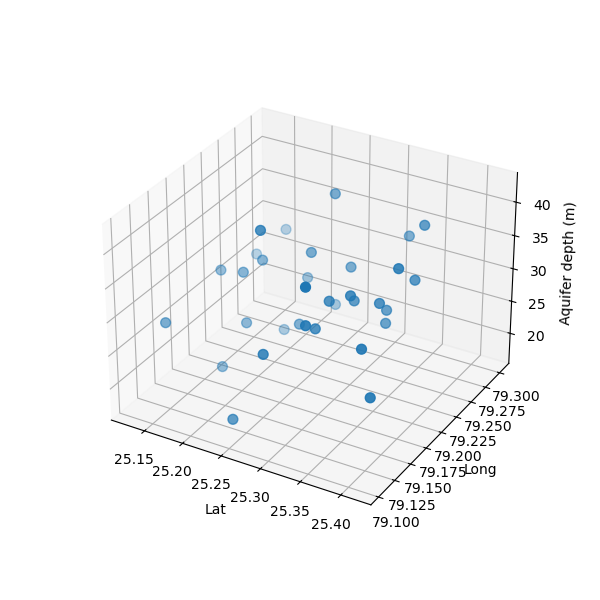

In [27]:
fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(projection='3d')
fig=ax.scatter(x_,y_,z_,s=50)
ax.set_xlabel('Lat')
ax.set_ylabel('Long')
ax.set_zlabel('Aquifer depth (m)')
# ax.set_title('Aquifer')
plt.savefig('basement_depth_prakash.png')
plt.show()

C:\Users\Matlab\AppData\Local\Temp\ipykernel_25068\2194908995.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(x="Aquifer depth (m)",data = df,kde=True,palette='crest') # to check the target column distribution


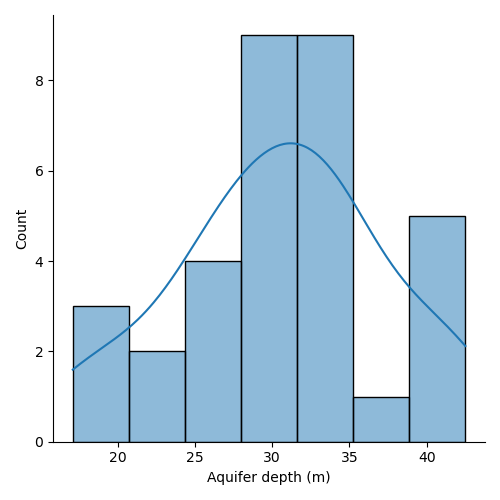

In [28]:
# plt.figure(figsize=(8,6))
sns.displot(x="Aquifer depth (m)",data = df,kde=True,palette='crest') # to check the target column distribution
plt.savefig('depth_dist_prakash.png')
plt.show()

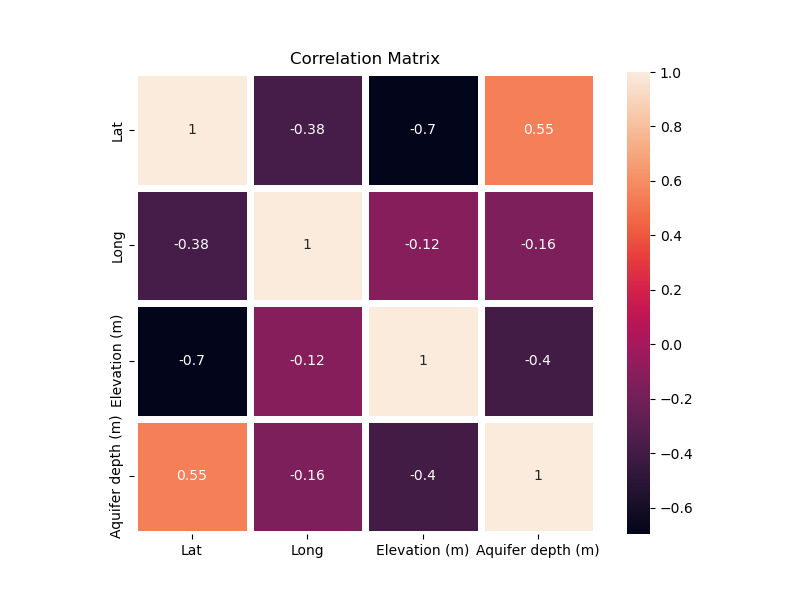

In [29]:
# Correlation matrix
corr_matrix = np.corrcoef(df.T)  # correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix.T,square=True,annot=True,cbar= True, linewidths=5, xticklabels=df.columns, yticklabels=df.columns)
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix_prakash.png')

# 1.Decison tree 

In [113]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Define your dataset (X, y)

# Define the parameter grid to search
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Decision Tree Regressor
dt_reg = DecisionTreeRegressor()

# Perform GridSearchCV to find the best random state and hyperparameters
best_random_state = None
best_test_r2 = -float('inf')
best_model_d = None
best_params = None

for random_state in range(100):  # Iterate over random state values
    # Splitting the data with the current random state
    X_train, X_test, y_train, y_test = train_test_split(Xx, y, test_size=0.2, random_state=random_state)
    
    # Perform GridSearchCV
    grid_search = GridSearchCV(dt_reg, param_grid, cv=5, scoring='r2',n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Evaluate the best estimator on the test set
    y_pred = grid_search.predict(X_test)
    test_r2 = r2_score(y_test, y_pred)

    # Determine if this random state gives better performance
    if test_r2 > best_test_r2:
        best_test_r2 = test_r2
        best_random_state = random_state
        best_model_d = grid_search.best_estimator_
        best_params = grid_search.best_params_
        # best_tree=best_model_d

print("Best Random State:", best_random_state)
print("Best Parameters:", best_params)

# Now, train a Decision Tree regressor using the best parameters and best random state
X_train, X_test, y_train, y_test = train_test_split(Xx, y, test_size=0.2, random_state=best_random_state)
best_model_d.fit(X_train, y_train)

# Make predictions
y_train_pred = best_model_d.predict(X_train)
y_test_pred = best_model_d.predict(X_test)
# # Plot the best tree
# plt.figure(figsize=(8, 6))
# plot_tree(best_tree, feature_names=Xx.columns, filled=True)
# plt.show()

Best Random State: 53
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}


# Model Evaluation Metrics

In [141]:
# Calculate evaluation metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# Print evaluation metrics
print("Training R2 Score:", train_r2)
print("Testing R2 Score:", test_r2)
print("Traing MSE:", train_mse)
print("Train RMSE:", train_rmse)
print("Testing MSE:", test_mse)
print("Testing RMSE:", test_rmse)


Training R2 Score: 0.2841916442838961
Testing R2 Score: 0.7972413988419562
Traing MSE: 35.55637174902423
Train RMSE: 5.96291637950963
Testing MSE: 4.341765099001817
Testing RMSE: 2.083690259851933


# Plotting Actual vs Predicted for testing data

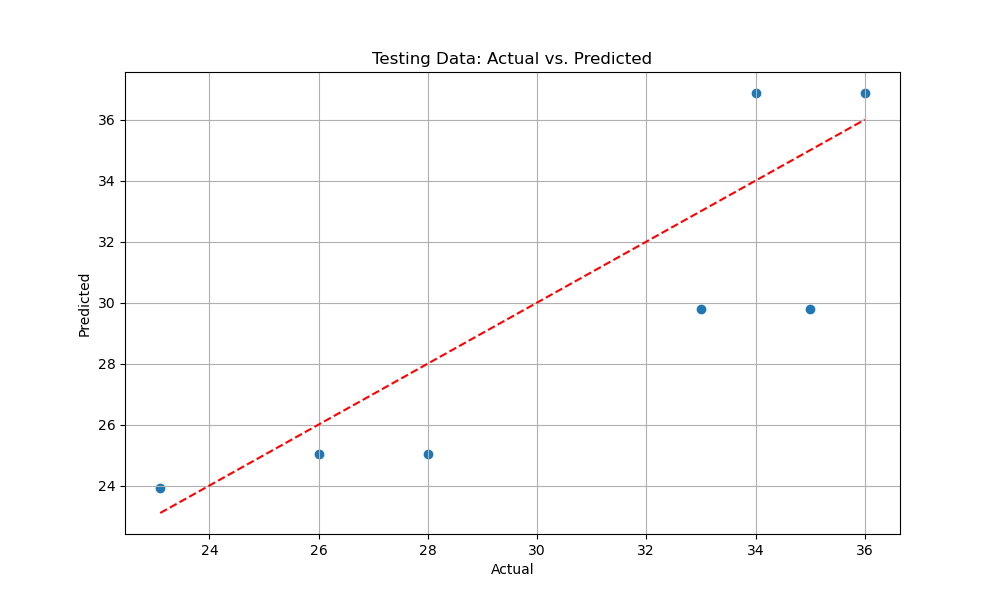

In [115]:
# Plotting actual vs predicted for testing data
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Plotting the diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Testing Data: Actual vs. Predicted')
plt.grid()
plt.show()

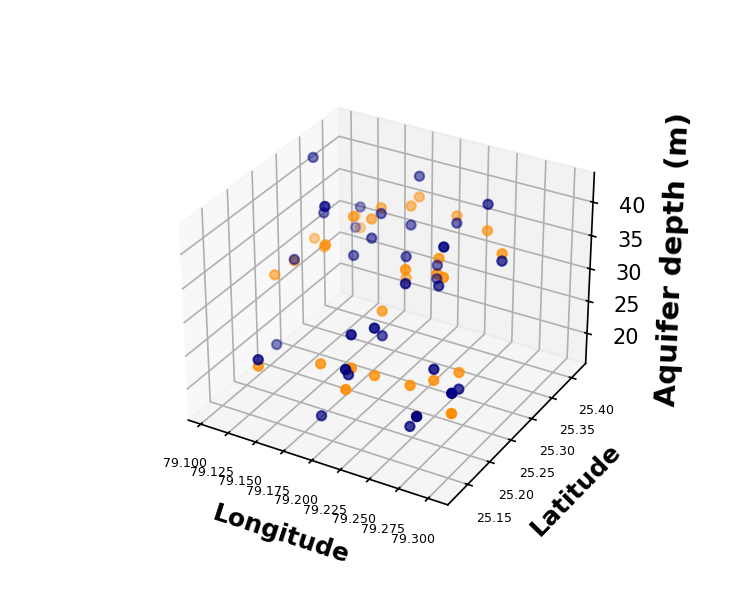

In [126]:
plt.rcParams["figure.figsize"] = (5,4)
plt.rcParams["figure.dpi"] = 150
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(projection = "3d")

# tree = DecisionTreeRegressor(max_depth = None, max_features=2, random_state=10)
# tree.fit(X, Y)

#tree.fit(Xx, Y)

# z_ST = tree.predict(xy).reshape(-1,1)

#z_predtree = tree.predict(x_pred) #vamos a evaluar el modelo
z_t = best_model_d.predict(Xx)

ax.scatter(y_, x_, z_, c = "navy")
# ax.scatter(Long, Lat, z_ST, c = "darkorange", s=0.4, alpha = 0.5)
ax.scatter(y_, x_, z_t, c = "darkorange")

ax.tick_params(axis='y', labelsize=6)
ax.tick_params(axis='x', labelsize=6)
ax.set_xlabel("Longitude", fontweight='bold', fontsize=12)
ax.set_ylabel("Latitude", fontweight='bold', fontsize=12)
ax.set_zlabel("Aquifer depth (m)", fontweight='bold', fontsize=14)
# ax.set_title("Decision Tree 3D Model", fontweight='bold', fontsize=16)
plt.savefig('Decision_Tree_3d.png')
# soft_index = len(np.unique(z_ST))/4000
# print("ST* Smooth Index:", soft_index)

# Decision tree 3d model

ST* Smooth Index: 0.0015


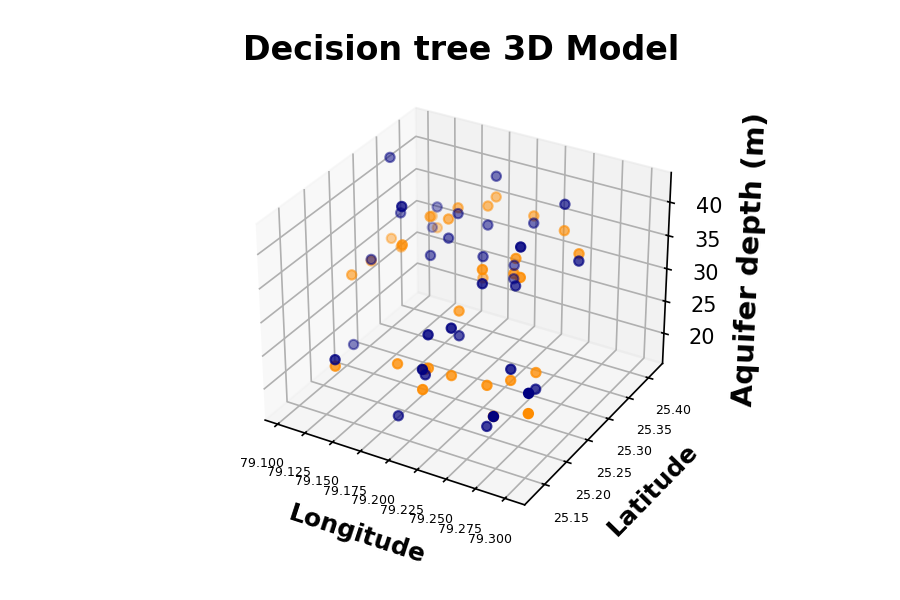

In [139]:
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams["figure.dpi"] = 150
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")

# tree = DecisionTreeRegressor(max_depth = None, max_features=2, random_state=10)
# tree.fit(X, Y)

#tree.fit(Xx, Y)

# z_ST = best_model_d.predict(xy).reshape(-1,1)

# z_predtree = best_model_d.predict(x_pred) #vamos a evaluar el modelo
z_t = best_model_d.predict(Xx)

ax.scatter(y_, x_, z_, c = "navy")
# ax.scatter(Long, Lat, z_ST, c = "darkorange", s=0.4, alpha = 0.5)
ax.scatter(y_, x_, z_t, c = "darkorange")

ax.tick_params(axis='y', labelsize=6)
ax.tick_params(axis='x', labelsize=6)
ax.set_xlabel("Longitude", fontweight='bold', fontsize=12)
ax.set_ylabel("Latitude", fontweight='bold', fontsize=12)
ax.set_zlabel("Aquifer depth (m)", fontweight='bold', fontsize=14)
ax.set_title("Decision tree 3D Model", fontweight='bold', fontsize=16)
plt.savefig('3d_decision_tree.png')
soft_index = len(np.unique(z_ST))/4000
print("ST* Smooth Index:", soft_index)

# 2.Random Forest

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Define your dataset (X, y)

# Define the parameter grid to search 
param_grid = {
    'n_estimators': [50,100],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest Regressor
rf_reg = RandomForestRegressor(n_jobs=-1)

# Perform GridSearchCV to find the best random state and hyperparameters
best_random_state = None
best_test_r2 = -float('inf')
best_model_r = None
best_params = None

for random_state in range(100):  # Iterate over random state values
    # Splitting the data with the current random state
    X_train, X_test, y_train, y_test = train_test_split(Xx, y, test_size=0.2, random_state=random_state)
    
    # Perform GridSearchCV
    grid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring='r2',n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Evaluate the best estimator on the test set
    y_pred = grid_search.predict(X_test)
    test_r2 = r2_score(y_test, y_pred)

    # Determine if this random state gives better performance
    if test_r2 > best_test_r2:
        best_test_r2 = test_r2
        best_random_state = random_state
        best_model_r = grid_search.best_estimator_
        best_params = grid_search.best_params_

print("Best Random State:", best_random_state)
print("Best Parameters:", best_params)

# Now, train a Random Forest regressor using the best parameters and best random state
X_train, X_test, y_train, y_test = train_test_split(Xx, y, test_size=0.2, random_state=best_random_state)
best_model_r.fit(X_train, y_train)

# Make predictions
y_train_pred = best_model_r.predict(X_train)
y_test_pred = best_model_r.predict(X_test)

Best Random State: 53
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}


# Model Evaluation Metrics

In [38]:
# Calculate evaluation metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# Print evaluation metrics
print("Training R2 Score:", train_r2)
print("Testing R2 Score:", test_r2)
print("Testing MSE:", test_mse)
print("Testing RMSE:", test_rmse)

Training R2 Score: 0.36380506865058493
Testing R2 Score: 0.8793510485348254
Testing MSE: 2.5835126288642676
Testing RMSE: 1.607330902105807


# Plotting Actual Vs Predicted for testing data

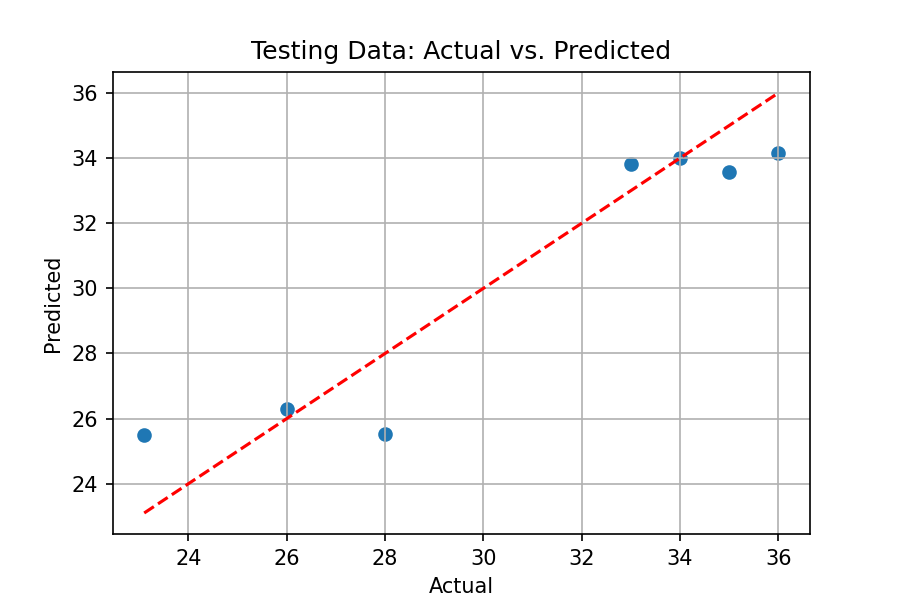

In [39]:
# Plotting actual vs predicted for testing data
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Plotting the diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Testing Data: Actual vs. Predicted')
plt.grid()
plt.show()

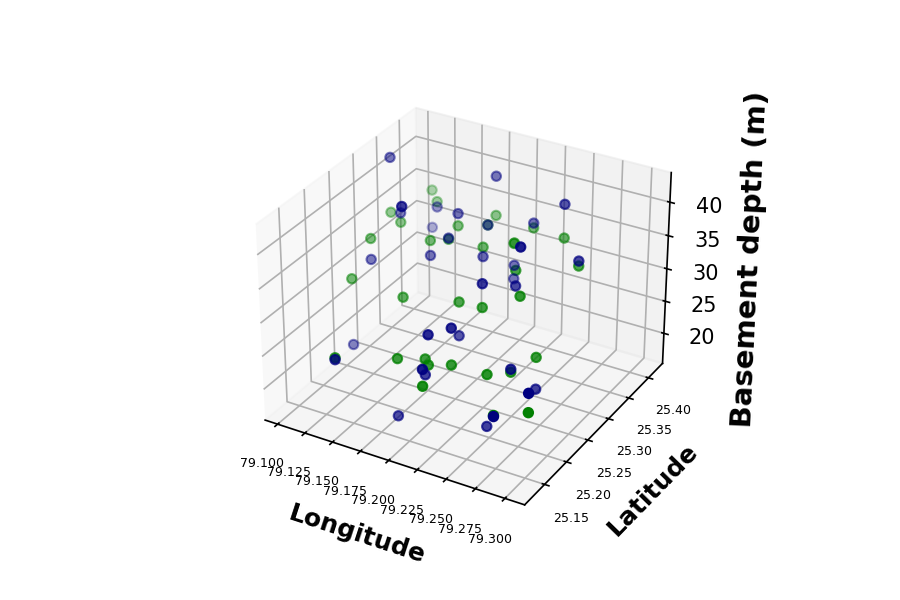

In [41]:
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams["figure.dpi"] = 150
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")

# tree = DecisionTreeRegressor(max_depth = None, max_features=2, random_state=10)
# tree.fit(X, Y)

#tree.fit(Xx, Y)

# z_ST = best_model_d.predict(xy).reshape(-1,1)

# z_predtree = best_model_d.predict(x_pred) #vamos a evaluar el modelo
z_t = best_model_r.predict(Xx)

ax.scatter(y_, x_, z_, c = "navy")
# ax.scatter(Long, Lat, z_ST, c = "darkorange", s=0.4, alpha = 0.5)
ax.scatter(y_, x_, z_t, c = "green")

ax.tick_params(axis='y', labelsize=6)
ax.tick_params(axis='x', labelsize=6)
ax.set_xlabel("Longitude", fontweight='bold', fontsize=12)
ax.set_ylabel("Latitude", fontweight='bold', fontsize=12)
ax.set_zlabel("Basement depth (m)", fontweight='bold', fontsize=14)
ax.set_title("", fontweight='bold', fontsize=16)
plt.savefig('erf.png')
# soft_index = len(np.unique(z_ST))/4000
# print("ST* Smooth Index:", soft_index)

# 3.Extremely Randomized Forest 

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Define your dataset (X, y)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Extra Trees Regressor
et_reg = ExtraTreesRegressor()

# Perform GridSearchCV to find the best random state and hyperparameters
best_random_state = None
best_test_r2 = -float('inf')
best_model_etr = None
best_params = None

for random_state in range(100):  # Iterate over random state values
    # Splitting the data with the current random state
    X_train, X_test, y_train, y_test = train_test_split(Xx, y, test_size=0.2, random_state=random_state)
    
    # Perform GridSearchCV
    grid_search = GridSearchCV(et_reg, param_grid, cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)

    # Evaluate the best estimator on the test set
    y_pred = grid_search.predict(X_test)
    test_r2 = r2_score(y_test, y_pred)

    # Determine if this random state gives better performance
    if test_r2 > best_test_r2:
        best_test_r2 = test_r2
        best_random_state = random_state
        best_model_etr = grid_search.best_estimator_
        best_params = grid_search.best_params_

print("Best Random State:", best_random_state)
print("Best Parameters:", best_params)

# Now, train an Extra Trees regressor using the best parameters and best random state
X_train, X_test, y_train, y_test = train_test_split(Xx, y, test_size=0.2, random_state=best_random_state)
best_model_etr.fit(X_train, y_train)

# Make predictions
y_train_pred = best_model_etr.predict(X_train)
y_test_pred = best_model_etr.predict(X_test)


# Model Evaluation Metrics

In [ ]:
# Calculate evaluation metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# Print evaluation metrics
print("Training R2 Score:", train_r2)
print("Testing R2 Score:", test_r2)
print("Training MSE:", train_mse)
print("Training RMSE:", train_rmse)
print("Testing MSE:", test_mse)
print("Testing RMSE:", test_rmse)

# Plotting actual vs predicted for testing data

In [ ]:
# Plotting actual vs predicted for testing data
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Plotting the diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Testing Data: Actual vs. Predicted')
plt.grid()
plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams["figure.dpi"] = 150
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")

# tree = DecisionTreeRegressor(max_depth = None, max_features=2, random_state=10)
# tree.fit(X, Y)

#tree.fit(Xx, Y)

# z_ST = best_model_d.predict(xy).reshape(-1,1)

# z_predtree = best_model_d.predict(x_pred) #vamos a evaluar el modelo
z_t = best_model_etr.predict(Xx)

ax.scatter(y_, x_, z_, c = "navy")
# ax.scatter(Long, Lat, z_ST, c = "darkorange", s=0.4, alpha = 0.5)
ax.scatter(y_, x_, z_t, c = "darkorange")

ax.tick_params(axis='y', labelsize=6)
ax.tick_params(axis='x', labelsize=6)
ax.set_xlabel("Longitude", fontweight='bold', fontsize=12)
ax.set_ylabel("Latitude", fontweight='bold', fontsize=12)
ax.set_zlabel("Aquifer depth (m)", fontweight='bold', fontsize=14)
ax.set_title("Extremely Randomized forest", fontweight='bold', fontsize=16)
plt.savefig('erf.png')
soft_index = len(np.unique(z_ST))/4000
print("ST* Smooth Index:", soft_index)

# 4.SVMR

In [30]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Define your dataset (X, y)

# Define the parameter grid to search
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.1, 0.01, 0.001]
}

# Initialize SVR
svr = SVR()

# Perform GridSearchCV to find the best random state and hyperparameters
best_random_state = None
best_test_r2 = -float('inf')
best_model_svm = None
best_params = None

for random_state in range(100):  # Iterate over random state values
    # Splitting the data with the current random state
    X_train, X_test, y_train, y_test = train_test_split(Xx, y, test_size=0.2, random_state=random_state)
    x_train_scaled=scaler.fit_transform(X_train)
    x_test_scaled=scaler.transform(X_test)
    # Perform GridSearchCV
    grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='r2',n_jobs=-1)
    grid_search.fit(x_train_scaled, y_train)

    # Evaluate the best estimator on the test set
    y_pred = grid_search.predict(x_test_scaled)
    test_r2 = r2_score(y_test, y_pred)

    # Determine if this random state gives better performance
    if test_r2 > best_test_r2:
        best_test_r2 = test_r2
        best_random_state = random_state
        best_model_svm = grid_search.best_estimator_
        best_params = grid_search.best_params_

print("Best Random State:", best_random_state)
print("Best Parameters:", best_params)

# Now, train an SVR model using the best parameters and best random state
X_train, X_test, y_train, y_test = train_test_split(Xx, y, test_size=0.2, random_state=best_random_state)
x_train_scaled=scaler.fit_transform(X_train)
x_test_scaled=scaler.transform(X_test)
best_model_svm.fit(x_train_scaled, y_train)

# Make predictions
y_train_pred = best_model_svm.predict(x_train_scaled)
y_test_pred = best_model_svm.predict(x_test_scaled)


Best Random State: 46
Best Parameters: {'C': 10, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}


# Model Evaluation Metrics

In [31]:
# Calculate evaluation metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# Print evaluation metrics
print("Training R2 Score:", train_r2)
print("Testing R2 Score:", test_r2)
print("Testing MSE:", test_mse)
print("Testing RMSE:", test_rmse)

Training R2 Score: 0.2369745141379811
Testing R2 Score: 0.5035593112623884
Testing MSE: 9.545439985735266
Testing RMSE: 3.0895695469976503


# Plotting actual vs predicted for testing data

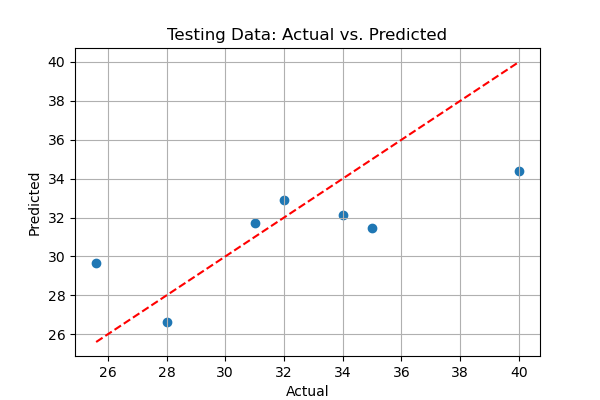

In [32]:
# Plotting actual vs predicted for testing data
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Plotting the diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Testing Data: Actual vs. Predicted')
plt.grid()
plt.show()

C:\Users\Matlab\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


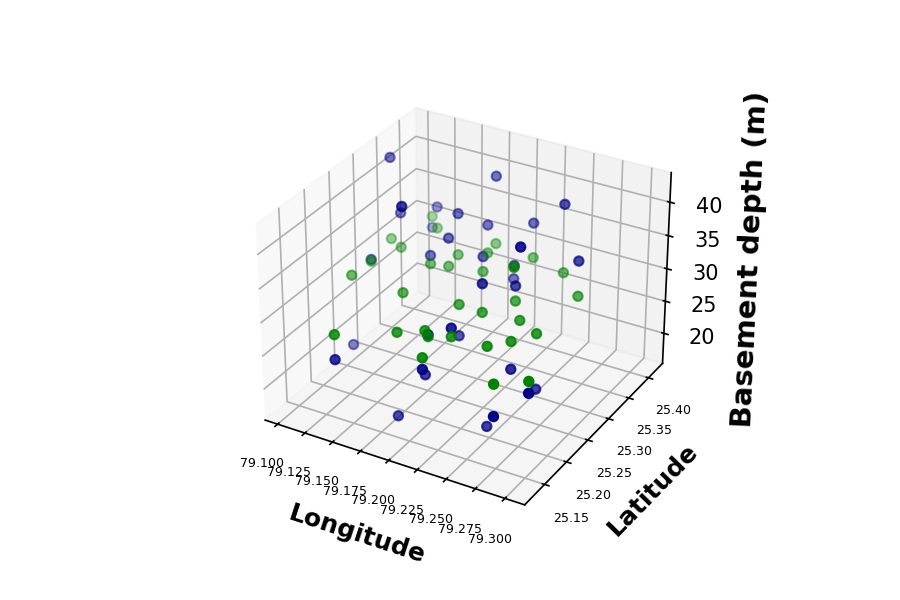

In [36]:
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams["figure.dpi"] = 150
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")

# tree = DecisionTreeRegressor(max_depth = None, max_features=2, random_state=10)
# tree.fit(X, Y)

#tree.fit(Xx, Y)

# z_ST = best_model_d.predict(xy).reshape(-1,1)

# z_predtree = best_model_d.predict(x_pred) #vamos a evaluar el modelo
z_t = best_model_svm.predict(Xx)

ax.scatter(y_, x_, z_, c = "navy")
# ax.scatter(Long, Lat, z_ST, c = "darkorange", s=0.4, alpha = 0.5)
ax.scatter(y_, x_, z_t, c = "green")

ax.tick_params(axis='y', labelsize=6)
ax.tick_params(axis='x', labelsize=6)
ax.set_xlabel("Longitude", fontweight='bold', fontsize=12)
ax.set_ylabel("Latitude", fontweight='bold', fontsize=12)
ax.set_zlabel("Basement depth (m)", fontweight='bold', fontsize=14)
ax.set_title("", fontweight='bold', fontsize=16)
plt.savefig('erf.png')
# soft_index = len(np.unique(z_ST))/4000
# print("ST* Smooth Index:", soft_index)

# 5.XGBoost

In [ ]:
# from xgboost import XGBRegressor
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import r2_score, mean_squared_error
# import numpy as np
# import matplotlib.pyplot as plt

# # Define your dataset (X, y)

# # Define the parameter grid to search
# param_grid = {
#     'n_estimators': [50, 100],
#     'max_depth': [3, 5, 7, 9],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'subsample': [0.5, 0.75, 1],
#     'colsample_bytree': [0.5, 0.75, 1],
#     'gamma': [0, 0.1, 0.2]
# }

# # Initialize XGBoost Regressor
# xgb_reg = XGBRegressor(n_jobs=-1)

# # Perform GridSearchCV to find the best random state and hyperparameters
# best_random_state = None
# best_test_r2 = -float('inf')
# best_model_xgb = None
# best_params = None

# for random_state in range(100):  # Iterate over random state values
#     # Splitting the data with the current random state
#     X_train, X_test, y_train, y_test = train_test_split(Xx, y, test_size=0.2, random_state=random_state)
    
#     # Perform GridSearchCV
#     grid_search = GridSearchCV(xgb_reg, param_grid, cv=5, scoring='r2',n_jobs=-1)
#     grid_search.fit(X_train, y_train)

#     # Evaluate the best estimator on the test set
#     y_pred = grid_search.predict(X_test)
#     test_r2 = r2_score(y_test, y_pred)

#     # Determine if this random state gives better performance
#     if test_r2 > best_test_r2:
#         best_test_r2 = test_r2
#         best_random_state = random_state
#         best_model_xgb = grid_search.best_estimator_
#         best_params = grid_search.best_params_

# print("Best Random State:", best_random_state)
# print("Best Parameters:", best_params)

# # Now, train an XGBoost regressor using the best parameters and best random state
# X_train, X_test, y_train, y_test = train_test_split(Xx, y, test_size=0.2, random_state=best_random_state)
# best_model_xgb.fit(X_train, y_train)

# # Make predictions
# y_train_pred = best_model_xgb.predict(X_train)
# y_test_pred = best_model_xgb.predict(X_test)


# Model Evaluation Metrics

In [ ]:
# # Calculate evaluation metrics
# train_r2 = r2_score(y_train, y_train_pred)
# test_r2 = r2_score(y_test, y_test_pred)
# train_mse = mean_squared_error(y_train, y_train_pred)
# test_mse = mean_squared_error(y_test, y_test_pred)
# train_rmse = np.sqrt(train_mse)
# test_rmse = np.sqrt(test_mse)

# # Print evaluation metrics
# print("Training R2 Score:", train_r2)
# print("Testing R2 Score:", test_r2)
# print("Testing MSE:", test_mse)
# print("Testing RMSE:", test_rmse)

# Plotting actual vs predicted for testing data

In [ ]:
# # Plotting actual vs predicted for testing data
# plt.figure(figsize=(6, 4))
# plt.scatter(y_test, y_test_pred)
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Plotting the diagonal line
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# plt.title('Testing Data: Actual vs. Predicted')
# plt.grid()
# plt.show()